In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("/content/tech_layoffs (1).csv")
print("✅ Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape)
df.head()

✅ Dataset Loaded Successfully!
Shape of dataset: (489, 9)


,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,2022-09-19,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


In [35]:
print(df.info())
print(df.isnull().sum())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB
None
company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_loca

In [36]:
df['reported_date'] = pd.to_datetime(df['reported_date'], errors='coerce')
print("\nNull Dates:", df['reported_date'].isnull().sum())




Null Dates: 0


In [37]:
df['industry'] = df['industry'].fillna("Unknown")
df['headquarter_location'] = df['headquarter_location'].fillna("Unknown")
df['status'] = df['status'].fillna("Unknown")


In [38]:
print("\nColumns:", df.columns.tolist())



Columns: ['company', 'total_layoffs', 'impacted_workforce_percentage', 'reported_date', 'industry', 'headquarter_location', 'sources', 'status', 'additional_notes']


In [39]:
print("Date Range:", df['reported_date'].min(), "→", df['reported_date'].max())


Date Range: 2022-01-27 00:00:00 → 2023-01-24 00:00:00


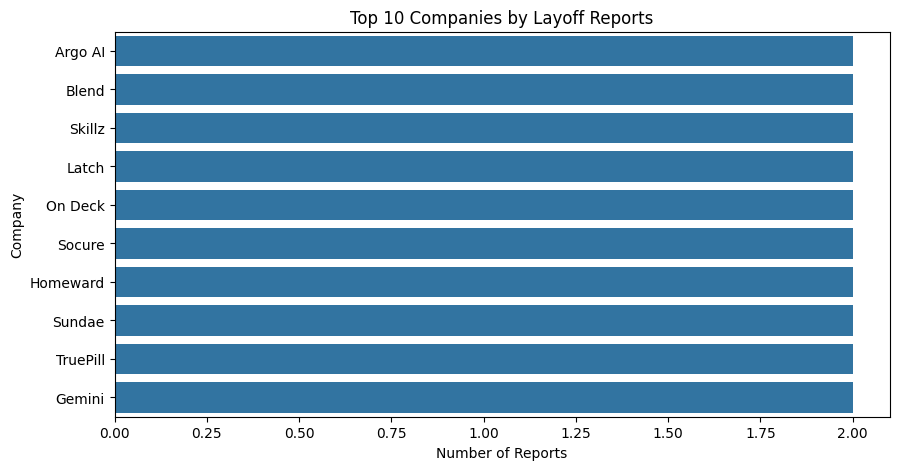

In [40]:
top_companies = df['company'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title("Top 10 Companies by Layoff Reports")
plt.xlabel("Number of Reports")
plt.ylabel("Company")
plt.show()


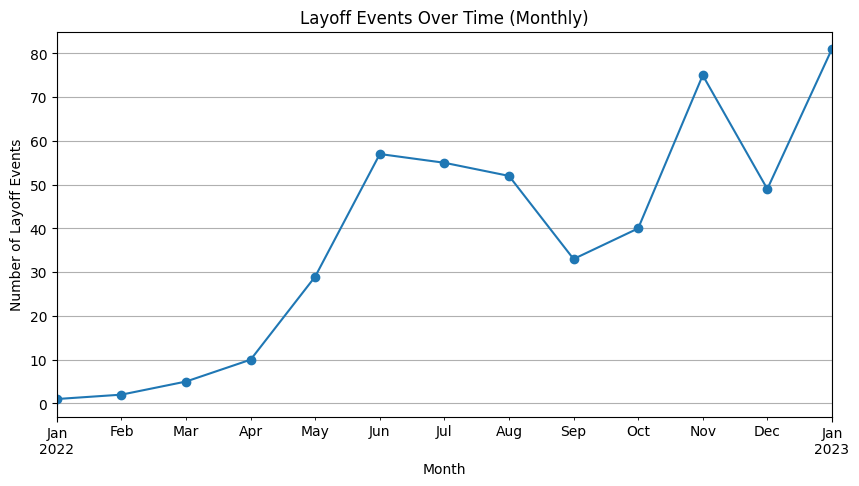

In [41]:
monthly = df.groupby(df['reported_date'].dt.to_period('M')).size()
monthly.plot(figsize=(10,5), marker='o')
plt.title("Layoff Events Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of Layoff Events")
plt.grid(True)
plt.show()

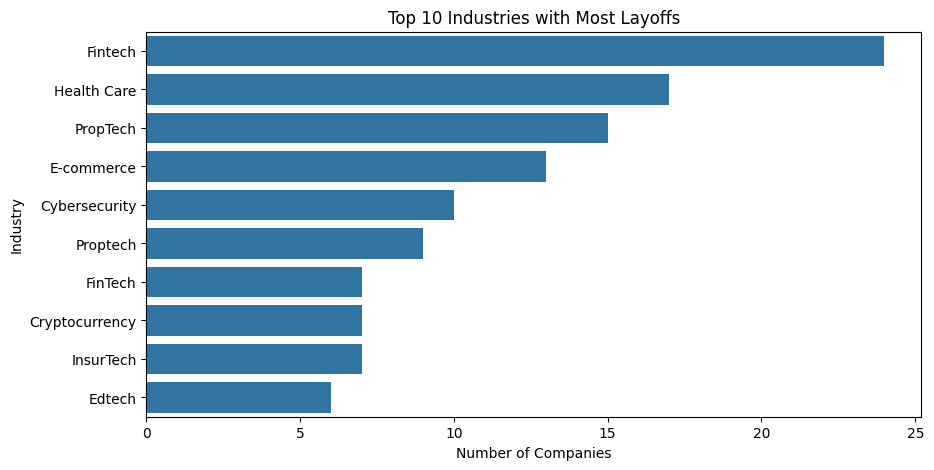

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='industry', order=df['industry'].value_counts().head(10).index)
plt.title("Top 10 Industries with Most Layoffs")
plt.xlabel("Number of Companies")
plt.ylabel("Industry")
plt.show()

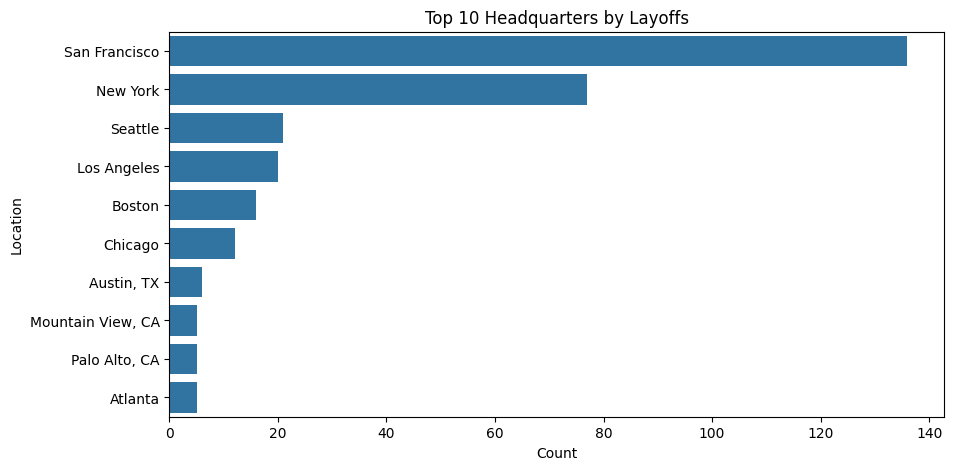

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='headquarter_location', order=df['headquarter_location'].value_counts().head(10).index)
plt.title("Top 10 Headquarters by Layoffs")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()


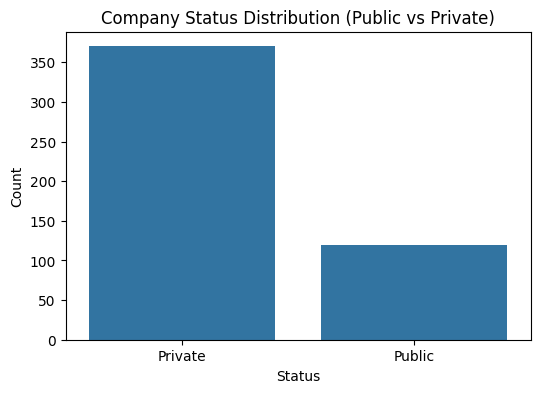

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(x='status', data=df)
plt.title("Company Status Distribution (Public vs Private)")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

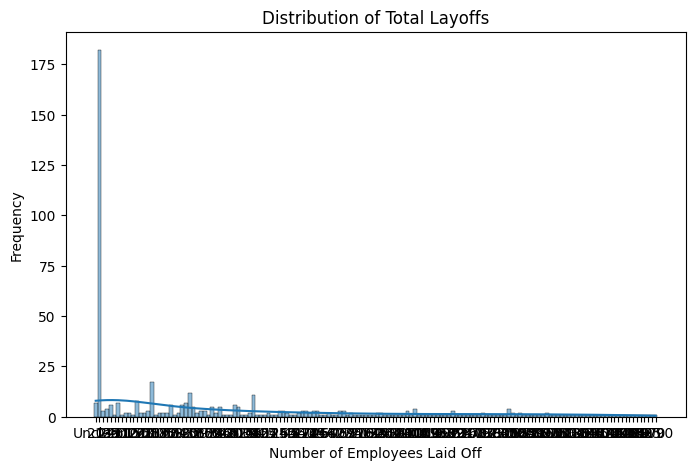

In [45]:
if 'total_layoffs' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['total_layoffs'], bins=30, kde=True)
    plt.title("Distribution of Total Layoffs")
    plt.xlabel("Number of Employees Laid Off")
    plt.ylabel("Frequency")
    plt.show()

In [46]:
df.to_csv("/content/tech_layoffs (1).csv", index=False)
print("💾 Cleaned dataset saved as '/content/tech_layoffs (1).csv'")


💾 Cleaned dataset saved as '/content/tech_layoffs (1).csv'
